**Separate Plots & Descriptive Stats**

/var/folders/5r/3zb78l7x2cb8py_g4z_s_c040000gn/T/ipykernel_38871/3071141720.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot1 = ax1.boxplot(data_p1, labels=years_p1, patch_artist=True)


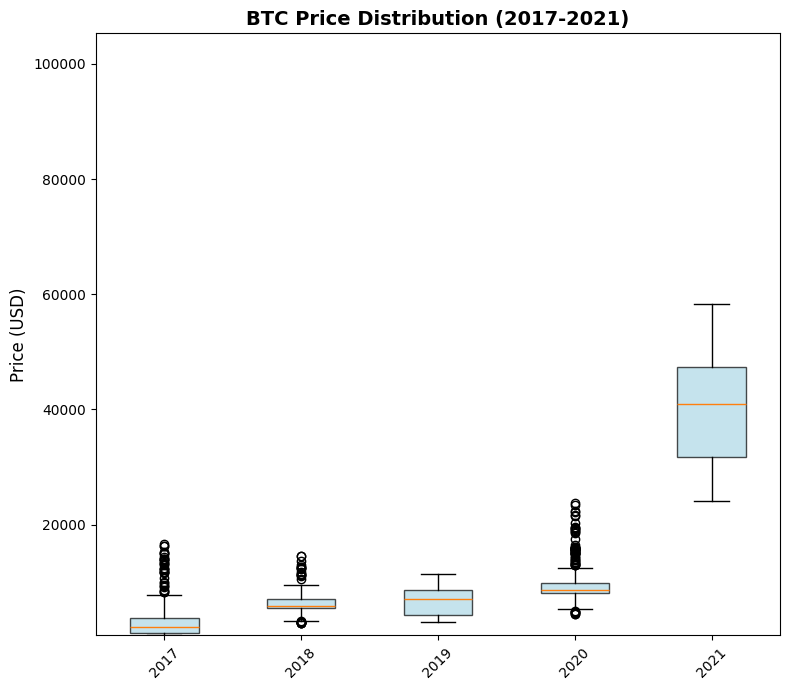

/var/folders/5r/3zb78l7x2cb8py_g4z_s_c040000gn/T/ipykernel_38871/3071141720.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot2 = ax2.boxplot(data_p2, labels=years_p2, patch_artist=True)


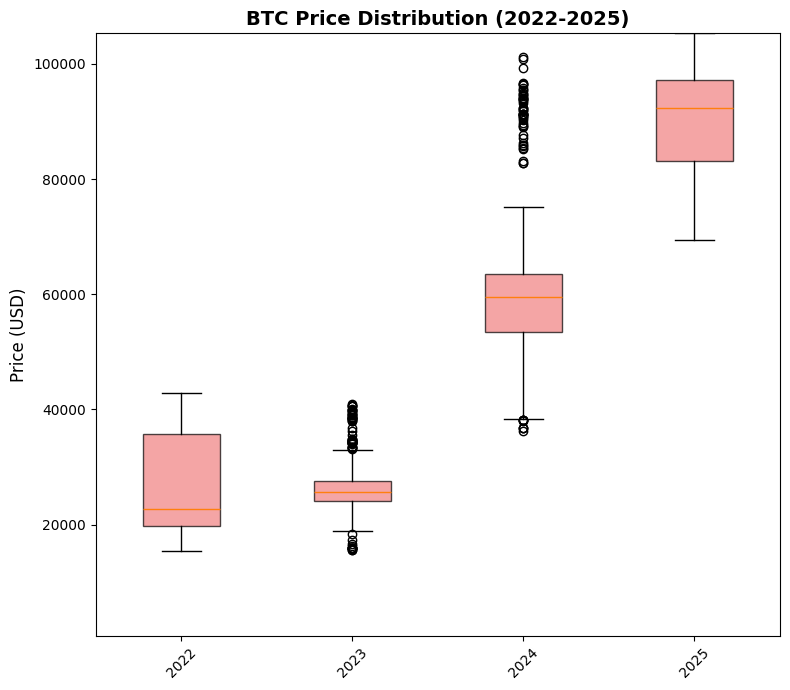


2017-2022 STATISTICS
2017: 365 data points
   Min: $734.29
   Max: $16590.71
   Median: $2284.20
   Mean: $3446.67
   Std Dev: $3397.92

2018: 365 data points
   Min: $2862.24
   Max: $14571.83
   Median: $5821.15
   Mean: $6374.03
   Std Dev: $1935.30

2019: 365 data points
   Min: $2998.16
   Max: $11443.04
   Median: $6997.71
   Mean: $6619.37
   Std Dev: $2384.03

2020: 366 data points
   Min: $4444.24
   Max: $23741.74
   Median: $8685.11
   Mean: $9637.35
   Std Dev: $3356.54

2021: 365 data points
   Min: $24165.56
   Max: $58305.04
   Median: $40885.14
   Mean: $40206.82
   Std Dev: $8723.94


2022-2025 STATISTICS
2022: 365 data points
   Min: $15408.91
   Max: $42877.15
   Median: $22691.77
   Mean: $26452.20
   Std Dev: $8521.85

2023: 365 data points
   Min: $15528.42
   Max: $40995.44
   Median: $25708.38
   Mean: $26589.81
   Std Dev: $5309.67

2024: 366 data points
   Min: $36317.15
   Max: $101138.94
   Median: $59520.47
   Mean: $60978.01
   Std Dev: $14468.22

2025: 2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your BTC data
btc = pd.read_csv('btc_data_U5.csv', parse_dates=['Date'], index_col='Date')

# Extract year from the date index
btc['Year'] = btc.index.year

# Filter data for the two periods
period1_data = btc[(btc['Year'] >= 2017) & (btc['Year'] <= 2021)]
period2_data = btc[(btc['Year'] >= 2022) & (btc['Year'] <= 2025)]

# Determine which column to use for price (adjust if needed)
price_column = 'Close'  

# --- Calculate global Y-axis range ---
global_min = min(period1_data[price_column].min(), period2_data[price_column].min())
global_max = max(period1_data[price_column].max(), period2_data[price_column].max())

# -------- First plot: 2017-2022 --------
fig1, ax1 = plt.subplots(figsize=(8, 7))
fig1.patch.set_alpha(0.0)  # Transparent background

years_p1 = sorted(period1_data['Year'].unique())
data_p1 = [period1_data[period1_data['Year'] == year][price_column].dropna().values for year in years_p1]

boxplot1 = ax1.boxplot(data_p1, labels=years_p1, patch_artist=True)
ax1.set_title('BTC Price Distribution (2017-2021)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (USD)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_facecolor('none')
ax1.set_ylim(global_min, global_max)  # Apply shared Y-axis

for box in boxplot1['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

plt.tight_layout()
plt.savefig('btc_boxplot_2017_2021.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# -------- Second plot: 2022-2025 --------
fig2, ax2 = plt.subplots(figsize=(8, 7))
fig2.patch.set_alpha(0.0)

years_p2 = sorted(period2_data['Year'].unique())
data_p2 = [period2_data[period2_data['Year'] == year][price_column].dropna().values for year in years_p2]

boxplot2 = ax2.boxplot(data_p2, labels=years_p2, patch_artist=True)
ax2.set_title('BTC Price Distribution (2022-2025)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price (USD)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_facecolor('none')
ax2.set_ylim(global_min, global_max)  # Apply shared Y-axis

for box in boxplot2['boxes']:
    box.set_facecolor('lightcoral')
    box.set_alpha(0.7)

plt.tight_layout()
plt.savefig('btc_boxplot_2022_2025.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("2017-2022 STATISTICS")
print("="*60)
for year in years_p1:
    year_data = period1_data[period1_data['Year'] == year][price_column]
    if len(year_data) > 0:
        print(f"{year}: {len(year_data)} data points")
        print(f"   Min: ${year_data.min():.2f}")
        print(f"   Max: ${year_data.max():.2f}")
        print(f"   Median: ${year_data.median():.2f}")
        print(f"   Mean: ${year_data.mean():.2f}")
        print(f"   Std Dev: ${year_data.std():.2f}")
        print()

print("\n" + "="*60)
print("2022-2025 STATISTICS")
print("="*60)
for year in years_p2:
    year_data = period2_data[period2_data['Year'] == year][price_column]
    if len(year_data) > 0:
        print(f"{year}: {len(year_data)} data points")
        print(f"   Min: ${year_data.min():.2f}")
        print(f"   Max: ${year_data.max():.2f}")
        print(f"   Median: ${year_data.median():.2f}")
        print(f"   Mean: ${year_data.mean():.2f}")
        print(f"   Std Dev: ${year_data.std():.2f}")
        print()


**Side-by-side Comparison**

/var/folders/5r/3zb78l7x2cb8py_g4z_s_c040000gn/T/ipykernel_38871/3294918616.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot1 = ax1.boxplot(data_p1, labels=years_p1, patch_artist=True)
/var/folders/5r/3zb78l7x2cb8py_g4z_s_c040000gn/T/ipykernel_38871/3294918616.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot2 = ax2.boxplot(data_p2, labels=years_p2, patch_artist=True)


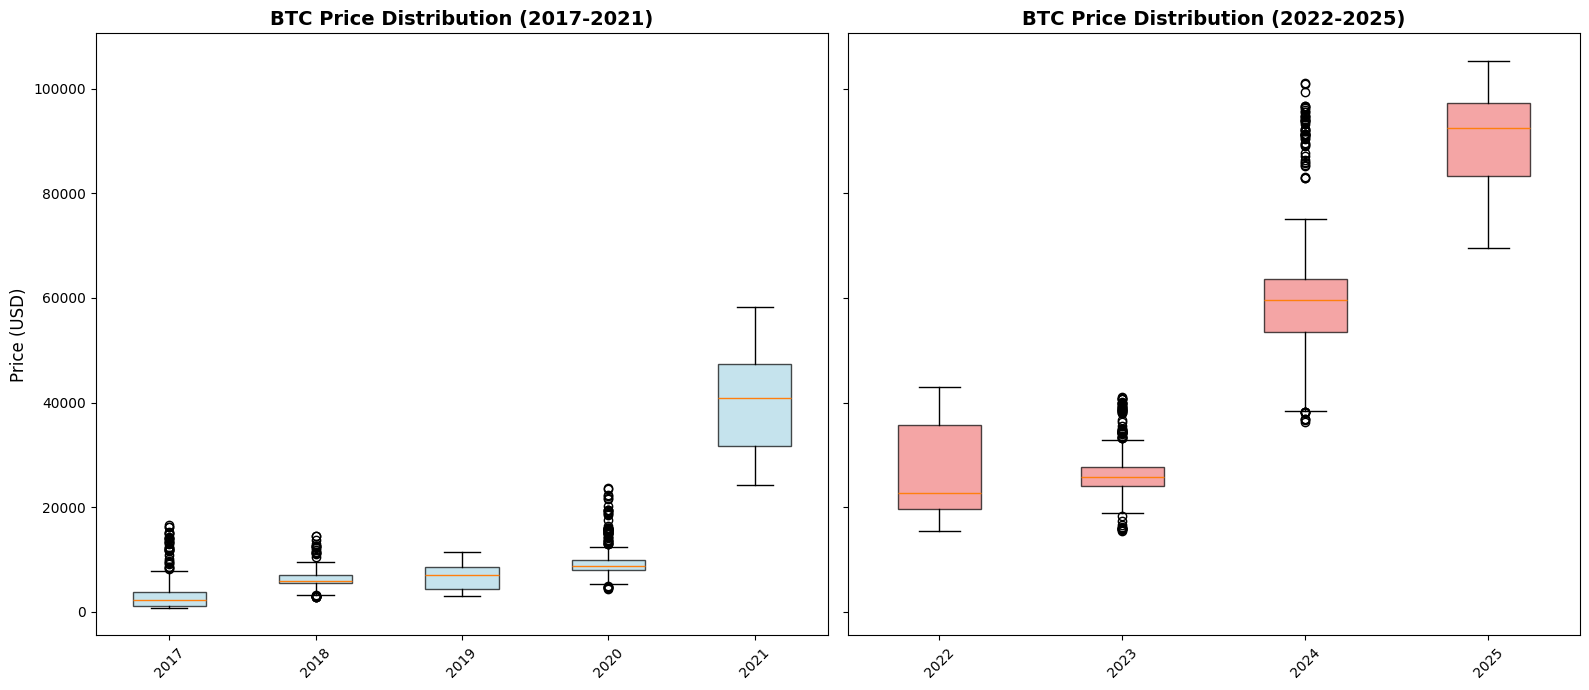

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your BTC data
btc = pd.read_csv('btc_data_U5.csv', parse_dates=['Date'], index_col='Date')

# Extract year from the date index
btc['Year'] = btc.index.year

# Filter data for the two periods
period1_data = btc[(btc['Year'] >= 2017) & (btc['Year'] <= 2021)]
period2_data = btc[(btc['Year'] >= 2022) & (btc['Year'] <= 2025)]

# Determine which column to use for price (adjust if needed)
price_column = 'Close'  

# -------- Create subplots with shared Y axis --------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
fig.patch.set_alpha(0.0)  # Transparent background

# First subplot: 2017-2022
years_p1 = sorted(period1_data['Year'].unique())
data_p1 = [period1_data[period1_data['Year'] == year][price_column].dropna().values for year in years_p1]

boxplot1 = ax1.boxplot(data_p1, labels=years_p1, patch_artist=True)
ax1.set_title('BTC Price Distribution (2017-2021)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (USD)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_facecolor('none')

for box in boxplot1['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

# Second subplot: 2022-2025
years_p2 = sorted(period2_data['Year'].unique())
data_p2 = [period2_data[period2_data['Year'] == year][price_column].dropna().values for year in years_p2]

boxplot2 = ax2.boxplot(data_p2, labels=years_p2, patch_artist=True)
ax2.set_title('BTC Price Distribution (2022-2025)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_facecolor('none')

for box in boxplot2['boxes']:
    box.set_facecolor('lightcoral')
    box.set_alpha(0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('btc_boxplots_sharedY.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()
